## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

#tuning
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#evaluation
from sklearn.metrics import f1_score,classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score

pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

## Load Data

In [2]:
df = pd.read_csv("https://media.githubusercontent.com/media/Marsh16/smoking-drinking-ALP-ML/main/smoking_drinking_data.csv")

In [3]:
df_original = pd.read_csv("https://media.githubusercontent.com/media/Marsh16/smoking-drinking-ALP-ML/main/smoking_drinking_data.csv")

In [4]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,100.424447,195.557020,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,24.179960,38.660155,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,25.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,193.000000,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,852.000000,2344.000000,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [ ]:
df.head()

In [6]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [7]:
df.duplicated().sum()

26

## Preprocessing

In [8]:
df["sex"] = df["sex"].map({"Male": 1, "Female": 0})
df["DRK_YN"] = df["DRK_YN"].map({"Y": 1, "N": 0})

smk_stat_mapping = {1: 0, 2: 1, 3: 2}
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].map(smk_stat_mapping)

In [9]:
df = df.drop_duplicates()

In [10]:
df.isnull().any()

sex                 False
age                 False
height              False
weight              False
waistline           False
sight_left          False
sight_right         False
hear_left           False
hear_right          False
SBP                 False
DBP                 False
BLDS                False
tot_chole           False
HDL_chole           False
LDL_chole           False
triglyceride        False
hemoglobin          False
urine_protein       False
serum_creatinine    False
SGOT_AST            False
SGOT_ALT            False
gamma_GTP           False
SMK_stat_type_cd    False
DRK_YN              False
dtype: bool

In [11]:
def grab_col_names(df, cat_th=10, car_th=20):
    """
    Returns the names of categorical, numeric, and categorical cardinal variables in the dataset.
    Note: Numeric variables with a categorical appearance are also included in the categorical variables.

    Parameters
    ------
        df: DataFrame
                The DataFrame for which variable names are to be retrieved.
        cat_th: int, optional
                Class threshold value for numeric but categorical variables.
        car_th: int, optional
                Class threshold value for categorical but cardinal variables.

    Returns
    ------
        cat_cols: list
                List of categorical variables.
        num_cols: list
                List of numeric variables.
        cat_but_car: list
                List of categorical variables that appear to be cardinal.

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        cat_cols + num_cols + cat_but_car = the total number of variables.
        num_but_cat is included in cat_cols.
        The sum of the 3 lists returned is equal to the total number of variables: cat_cols + num_cols + cat_but_car = the number of variables.

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and
                   df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and
                   df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations(Rows): {df.shape[0]}")
    print(f"Variables(Columns): {df.shape[1]}\n")
    print(f'cat_cols: {len(cat_cols)}\nnum_cols: {len(num_cols)}\ncat_but_car: {len(cat_but_car)}\nnum_but_cat: {len(num_but_cat)}')
    print(f"\ncat_cols: {cat_cols}\nnum_cols: {num_cols}\ncat_but_car: {cat_but_car}\n")

    print(f"\ncat_cols data types:\n\n{df[cat_cols].dtypes}\n\nnum_cols data types:\n\n{df[num_cols].dtypes}\n\ncat_but_car data types:\n\n{df[cat_but_car].dtypes}")

    return cat_cols, num_cols, cat_but_car

In [12]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations(Rows): 991320
Variables(Columns): 24

cat_cols: 6
num_cols: 18
cat_but_car: 0
num_but_cat: 6

cat_cols: ['sex', 'hear_left', 'hear_right', 'urine_protein', 'SMK_stat_type_cd', 'DRK_YN']
num_cols: ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']
cat_but_car: []


cat_cols data types:

sex                   int64
hear_left           float64
hear_right          float64
urine_protein       float64
SMK_stat_type_cd      int64
DRK_YN                int64
dtype: object

num_cols data types:

age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           

In [13]:
possible_na = ["waistline", "sight_left", "sight_right", "SGOT_AST", "gamma_GTP"]
print(possible_na)

['waistline', 'sight_left', 'sight_right', 'SGOT_AST', 'gamma_GTP']


In [14]:
for column in possible_na:
    df = df[df[column] != df[column].max()]

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,985283.0,0.530715,0.499056,0.0,0.0,1.0,1.0,1.0
age,985283.0,47.534602,14.146143,20.0,35.0,45.0,60.0,85.0
height,985283.0,162.259681,9.278972,130.0,155.0,160.0,170.0,190.0
weight,985283.0,63.298403,12.518547,25.0,55.0,60.0,70.0,140.0
waistline,985283.0,81.166575,9.593146,8.0,74.0,81.0,87.6,149.1
sight_left,985283.0,0.953213,0.341180,0.1,0.7,1.0,1.2,2.5
sight_right,985283.0,0.950827,0.339703,0.1,0.7,1.0,1.2,2.5
hear_left,985283.0,1.031064,0.173491,1.0,1.0,1.0,1.0,2.0
hear_right,985283.0,1.030069,0.170776,1.0,1.0,1.0,1.0,2.0
SBP,985283.0,122.400476,14.527961,70.0,112.0,120.0,131.0,273.0


In [16]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    """
    Calculate lower and upper thresholds for detecting outliers in a column of a DataFrame.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        col_name (str): The name of the column for which outliers will be detected.
        q1 (float): The lower quantile value to determine the lower threshold.
        q3 (float): The upper quantile value to determine the upper threshold.

    Returns:
        float: The lower threshold value.
        float: The upper threshold value.
    """
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(df, col_name):
    """
    Check for outliers in a column of a DataFrame based on specified thresholds.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        col_name (str): The name of the column to check for outliers.

    Returns:
        bool: True if outliers are found, False if not.
    """
    low_limit, up_limit = outlier_thresholds(df, col_name)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


outlier_cols = []
for col in num_cols:
    if check_outlier(df, col):
        outlier_cols.append(col)
        print(col)

waistline
SBP
DBP
BLDS
tot_chole
HDL_chole
LDL_chole
triglyceride
hemoglobin
serum_creatinine
SGOT_AST
SGOT_ALT
gamma_GTP


In [17]:
def winsorize(dataframe, col_name, lower_quantile=0.05, upper_quantile=0.95):
    """
    Apply Winsorization to a specific column in a DataFrame.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        col_name (str): The name of the column to winsorize.
        lower_quantile (float): The lower quantile value for determining the lower limit.
        upper_quantile (float): The upper quantile value for determining the upper limit.

    Returns:
        None
    """
    lower_limit, upper_limit = outlier_thresholds(dataframe, col_name, q1=lower_quantile, q3=upper_quantile)
    dataframe[col_name] = dataframe[col_name].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))


# Defining lower and upper quantiles for Winsorization
lower_quantile = 0.05
upper_quantile = 0.95

# Apply Winsorization
for col in outlier_cols:
    winsorize(df, col, lower_quantile, upper_quantile)

Summary for 'sex':
        sex      Ratio
sex                   
1    522904  53.071453
0    462379  46.928547
##########################################


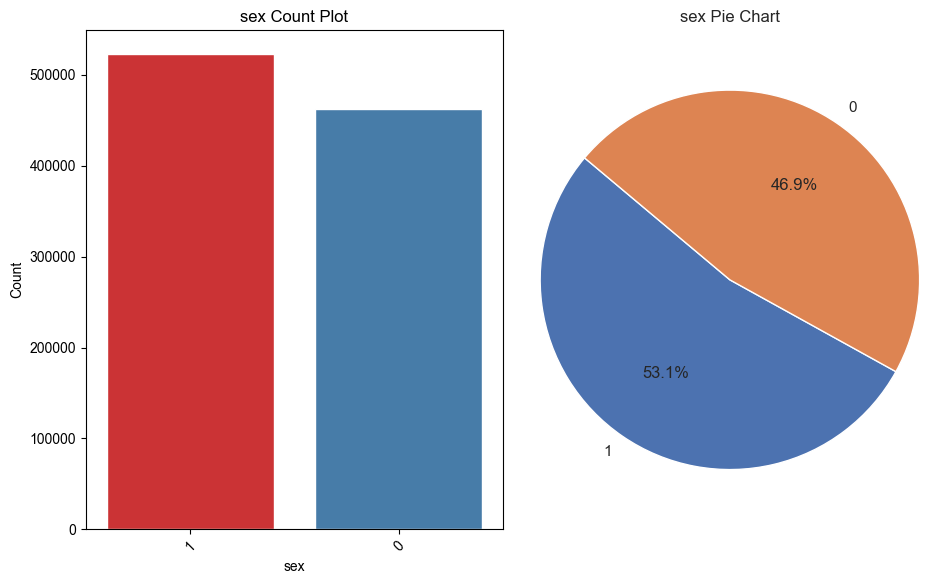

Summary for 'hear_left':
           hear_left      Ratio
hear_left                      
1.0           954676  96.893583
2.0            30607   3.106417
##########################################


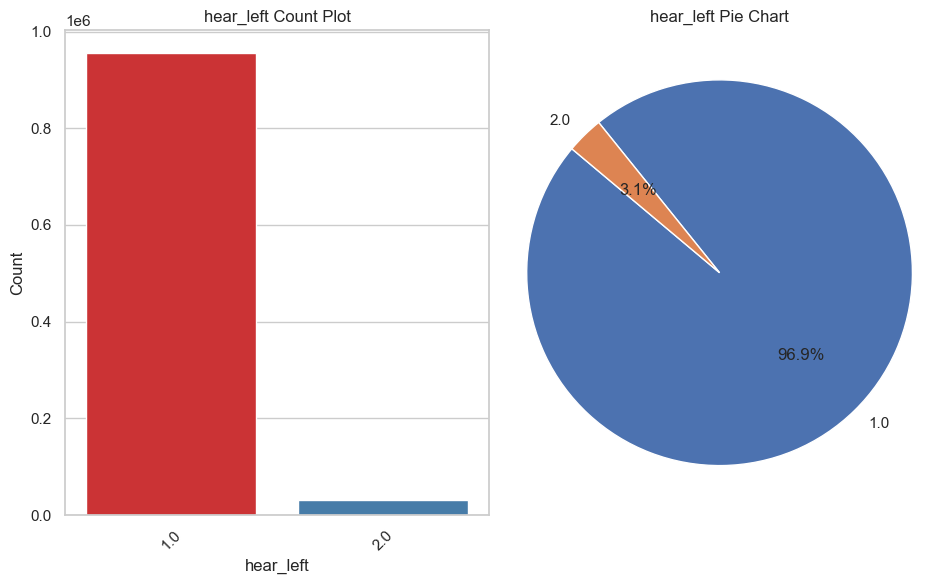

Summary for 'hear_right':
            hear_right      Ratio
hear_right                       
1.0             955657  96.993148
2.0              29626   3.006852
##########################################


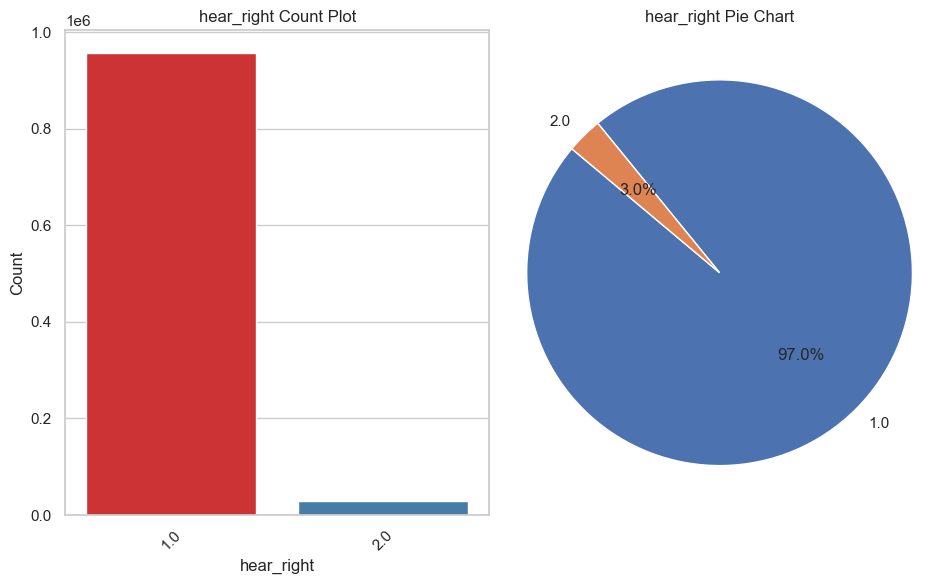

Summary for 'urine_protein':
               urine_protein      Ratio
urine_protein                          
1.0                   929669  94.355530
2.0                    30622   3.107940
3.0                    16226   1.646836
4.0                     6325   0.641948
5.0                     1943   0.197202
6.0                      498   0.050544
##########################################


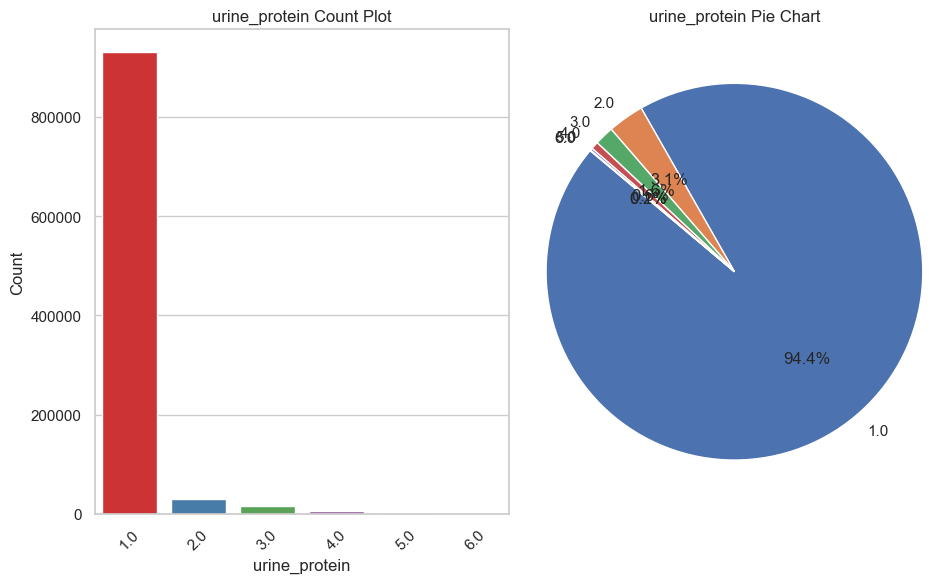

Summary for 'SMK_stat_type_cd':
                  SMK_stat_type_cd      Ratio
SMK_stat_type_cd                             
0                           598806  60.775026
2                           212745  21.592273
1                           173732  17.632700
##########################################


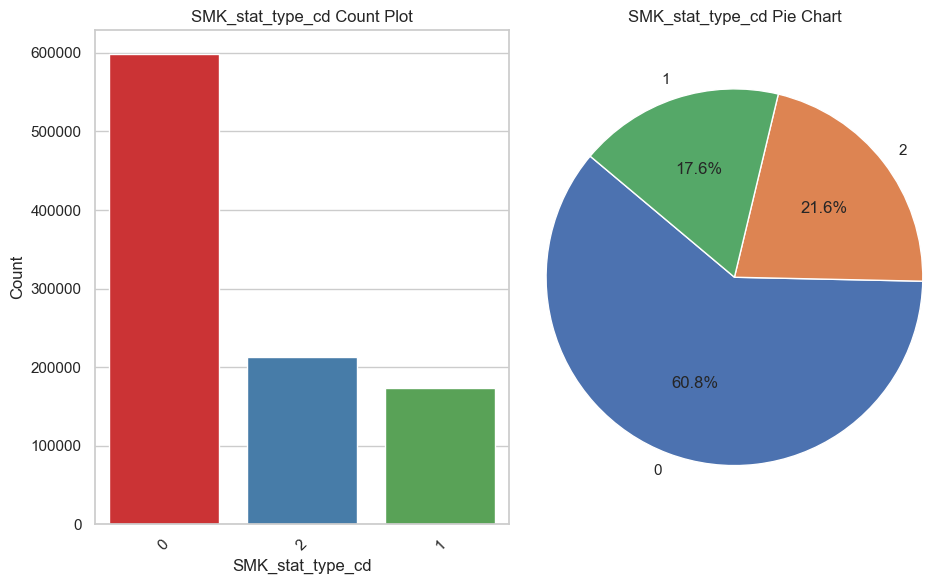

Summary for 'DRK_YN':
        DRK_YN      Ratio
DRK_YN                   
1       493252  50.061962
0       492031  49.938038
##########################################


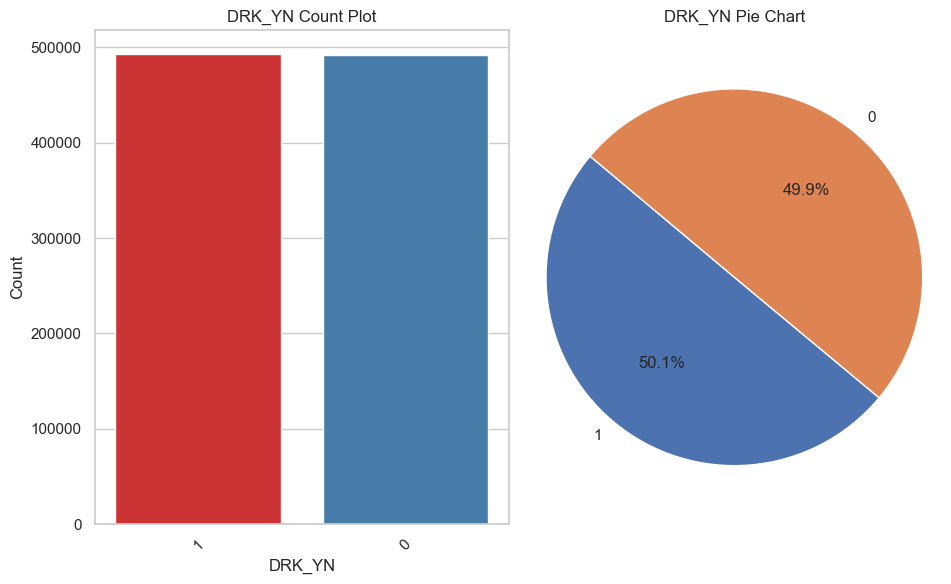

In [18]:
def cat_summary(dataframe, col_name, plot=True):
    """
    Generate a summary for a categorical column in a DataFrame, including value counts, ratios, and optional plots.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        col_name (str): The name of the categorical column to summarize.
        plot (bool, optional): Whether to generate plots (count plot and pie chart). Default is True.

    Returns:
        None
    """
    value_counts = dataframe[col_name].value_counts()
    value_ratios = 100 * value_counts / len(dataframe)

    summary_df = pd.DataFrame({col_name: value_counts, "Ratio": value_ratios})

    print(f"Summary for '{col_name}':")
    print(summary_df)
    print("##########################################")

    if plot:
        plt.figure(figsize=(14, 6))

        # Count Plot
        plt.subplot(1, 3, 1)
        sns.set(style="whitegrid")
        sns.countplot(x=col_name, data=dataframe, palette="Set1", order=value_counts.index)
        plt.xticks(rotation=45)
        plt.xlabel(col_name)
        plt.ylabel("Count")
        plt.title(f"{col_name} Count Plot")

        # Pie Chart
        plt.subplot(1, 3, 2)
        labels = value_counts.index
        sizes = value_counts.values
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')
        plt.title(f"{col_name} Pie Chart")

        plt.tight_layout()
        plt.show()


for col in cat_cols:
    cat_summary(df, col, True)


Statistics for 'age' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean        51.557188      43.521973
std         14.345030      12.736516
min         20.000000      20.000000
5%          25.000000      25.000000
10%         30.000000      25.000000
20%         40.000000      30.000000
30%         45.000000      35.000000
40%         50.000000      40.000000
50%         50.000000      45.000000
60%         55.000000      45.000000
70%         60.000000      50.000000
80%         65.000000      55.000000
90%         70.000000      60.000000
95%         75.000000      65.000000
99%         80.000000      75.000000
max         85.000000      85.000000


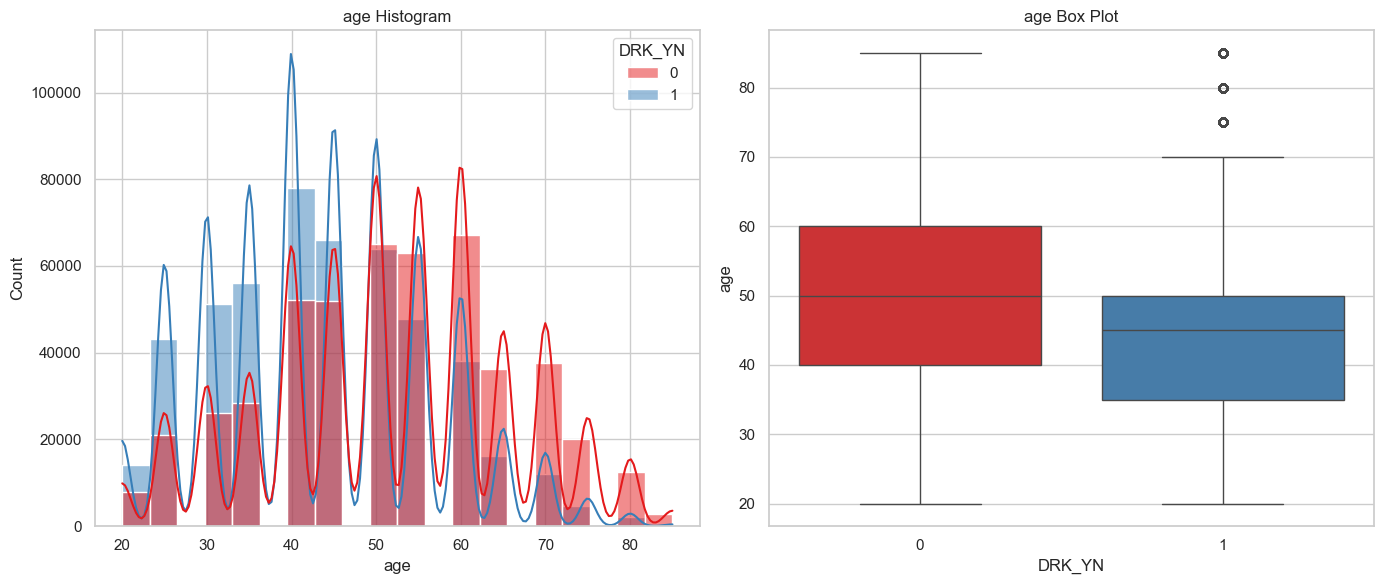


Statistics for 'height' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean       158.783816     165.726941
std          8.923699       8.275067
min        130.000000     130.000000
5%         145.000000     150.000000
10%        150.000000     155.000000
20%        150.000000     160.000000
30%        155.000000     160.000000
40%        155.000000     165.000000
50%        160.000000     165.000000
60%        160.000000     170.000000
70%        165.000000     170.000000
80%        165.000000     175.000000
90%        170.000000     175.000000
95%        175.000000     180.000000
99%        180.000000     185.000000
max        190.000000     190.000000


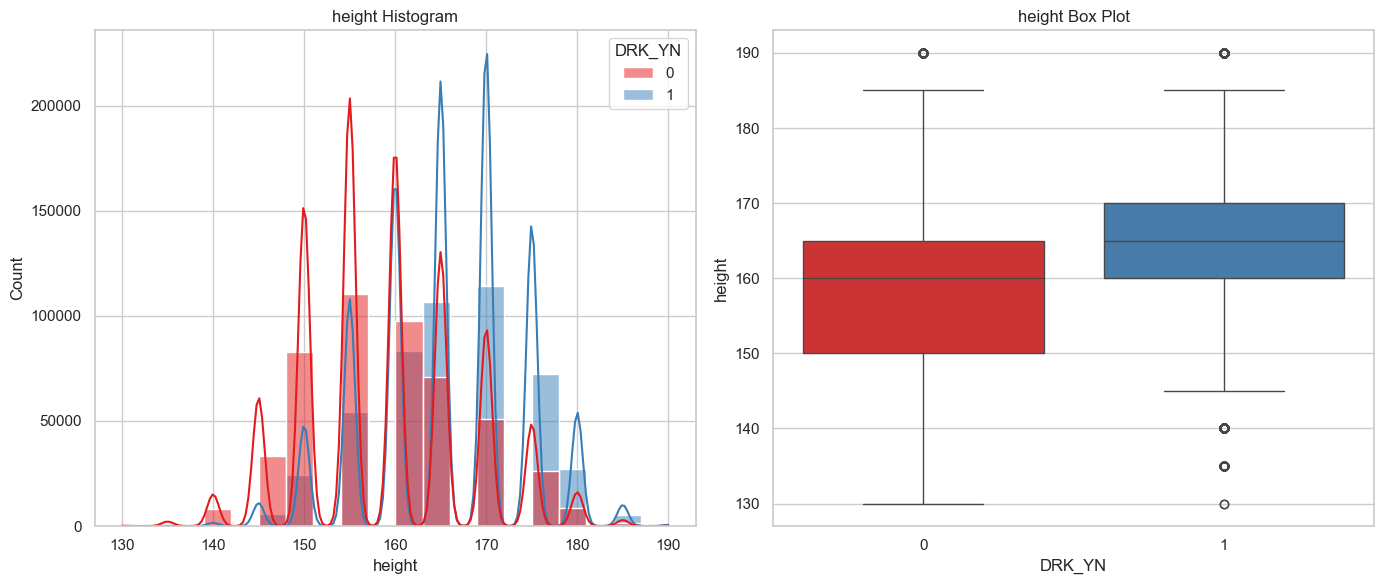


Statistics for 'weight' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean        59.988517      66.600095
std         11.544416      12.580435
min         25.000000      30.000000
5%          45.000000      50.000000
10%         45.000000      50.000000
20%         50.000000      55.000000
30%         55.000000      60.000000
40%         55.000000      65.000000
50%         60.000000      65.000000
60%         60.000000      70.000000
70%         65.000000      75.000000
80%         70.000000      75.000000
90%         75.000000      85.000000
95%         80.000000      90.000000
99%         95.000000     100.000000
max        140.000000     140.000000


In [19]:
def num_summary(dataframe, numerical_col, target_col, quantiles=None, plot=False):
    """
    Generate a summary for a numerical column in a DataFrame, including summary statistics, and optional plots.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        numerical_col (str): The name of the numerical column to summarize.
        target_col (str): The name of the target column for grouping the summary.
        quantiles (list of float, optional): Custom quantiles for summary statistics. Default is None.
        plot (bool, optional): Whether to generate plots (histogram and box plot). Default is False.

    Returns:
        None
    """
    if quantiles is None:
        quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    summary = dataframe[numerical_col].describe(percentiles=quantiles).T

    summary_by_target = dataframe.groupby(target_col)[numerical_col].describe(percentiles=quantiles).T

    print(f"\nStatistics for '{numerical_col}' Grouped by {target_col}")
    print(summary_by_target)

    if plot:
        plt.figure(figsize=(14, 6))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(dataframe, x=numerical_col, hue=target_col, bins=20, palette='Set1', kde=True)
        plt.title(f"{numerical_col} Histogram")
        plt.xlabel(numerical_col)

        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=target_col, y=numerical_col, data=dataframe, palette='Set1')
        plt.title(f"{numerical_col} Box Plot")

        plt.tight_layout()
        plt.show()
for col in num_cols:
    num_summary(df, col, "DRK_YN", plot=True)

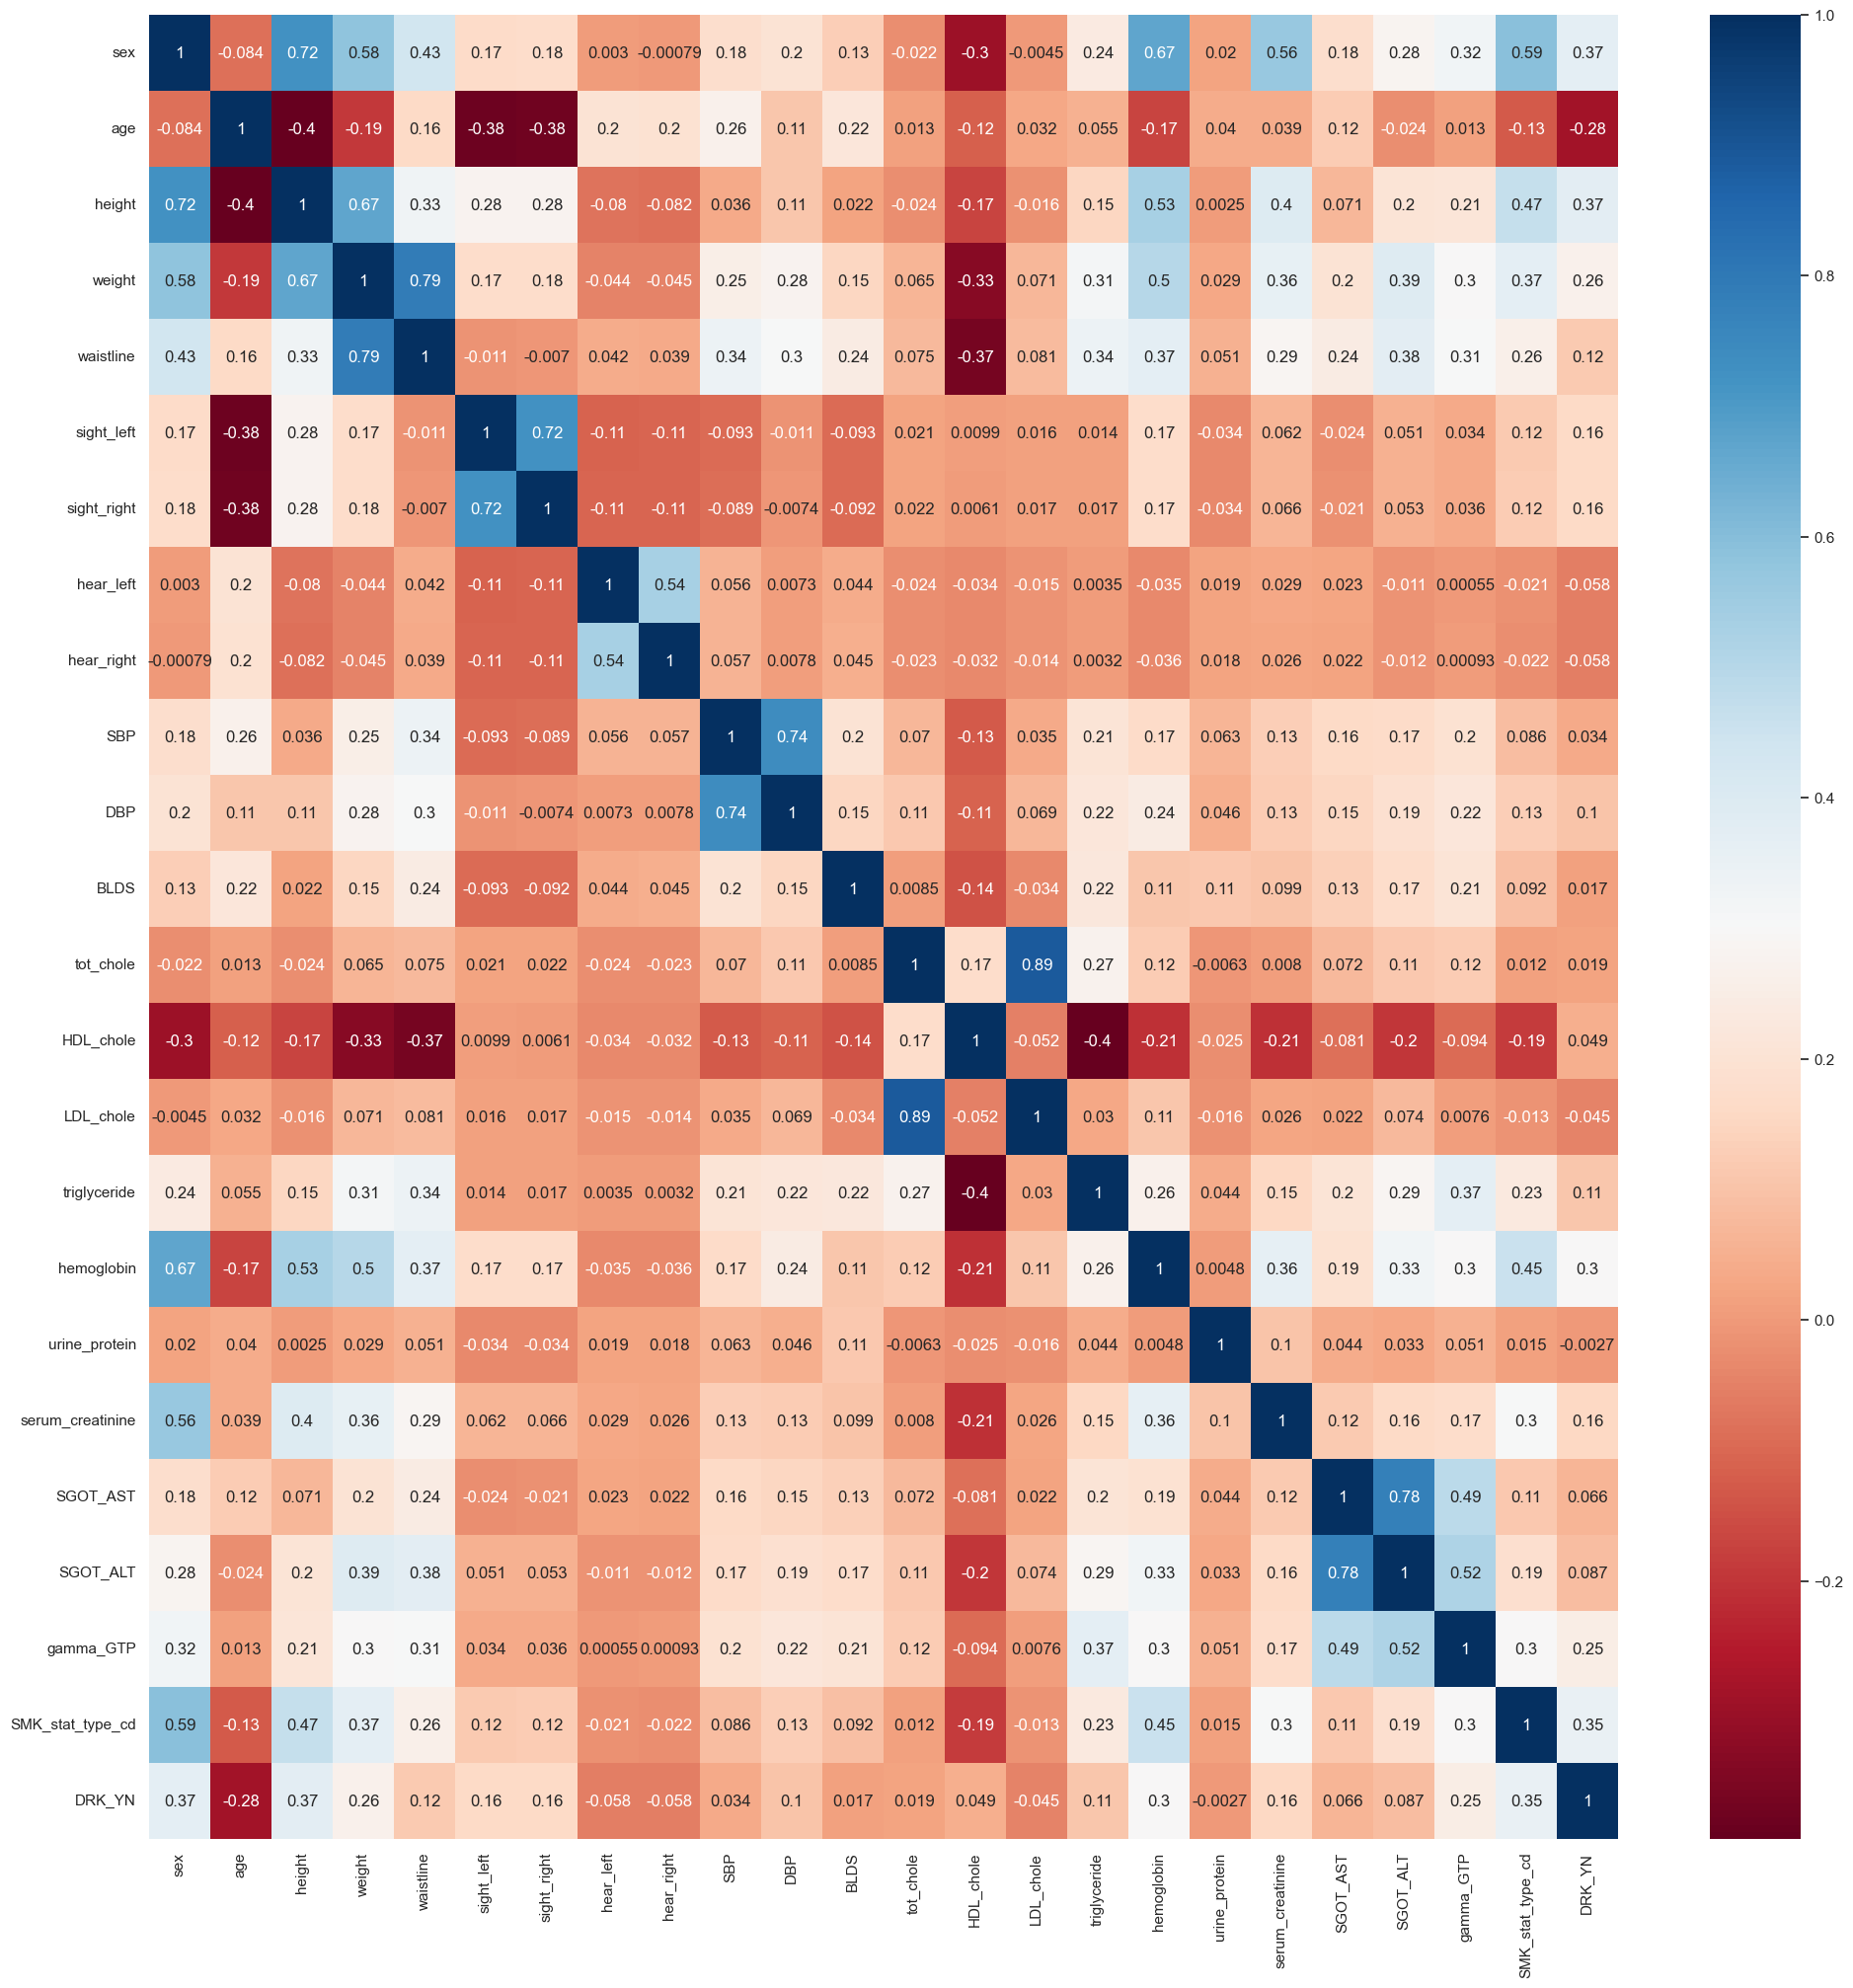

In [ ]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    """
    Identify columns in a DataFrame with high correlation to each other.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        plot (bool, optional): Whether to plot the correlation matrix. Default is False.
        corr_th (float, optional): The correlation threshold above which columns are considered highly correlated. Default is 0.90.

    Returns:
        list: A list of column names that are highly correlated.
    """
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (24, 24)})
        sns.heatmap(corr, cmap="RdBu", annot=True)
        plt.show(block=True)
    return drop_list

high_corr_cols = high_correlated_cols(df, True)

In [ ]:
# BMI = weight(kg) / (height(m)^2)
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)


conditions = [
    (df['BMI'] < 18.5),
    (df['BMI'] >= 18.5) & (df['BMI'] < 25),
    (df['BMI'] >= 25) & (df['BMI'] < 30),
    (df['BMI'] >= 30)
]

# labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']

df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, float('inf')], labels=['0', '1', '2', '3'])

# Mean arterial pressure (MAP) = DBP + (SBP - DBP) / 3
df['MAP'] = df['DBP'] + (df['SBP'] - df['DBP']) / 3

# Liver_Enzyme_Ratio = SGOT_AST / SGOT_ALT
df['Liver_Enzyme_Ratio'] = df['SGOT_AST'] / df['SGOT_ALT']


# Anemia_Indicator if hemoglobin < 12 --> anemia
anemia_threshold = 12
df['Anemia_Indicator'] = (df['hemoglobin'] < anemia_threshold).astype(int)

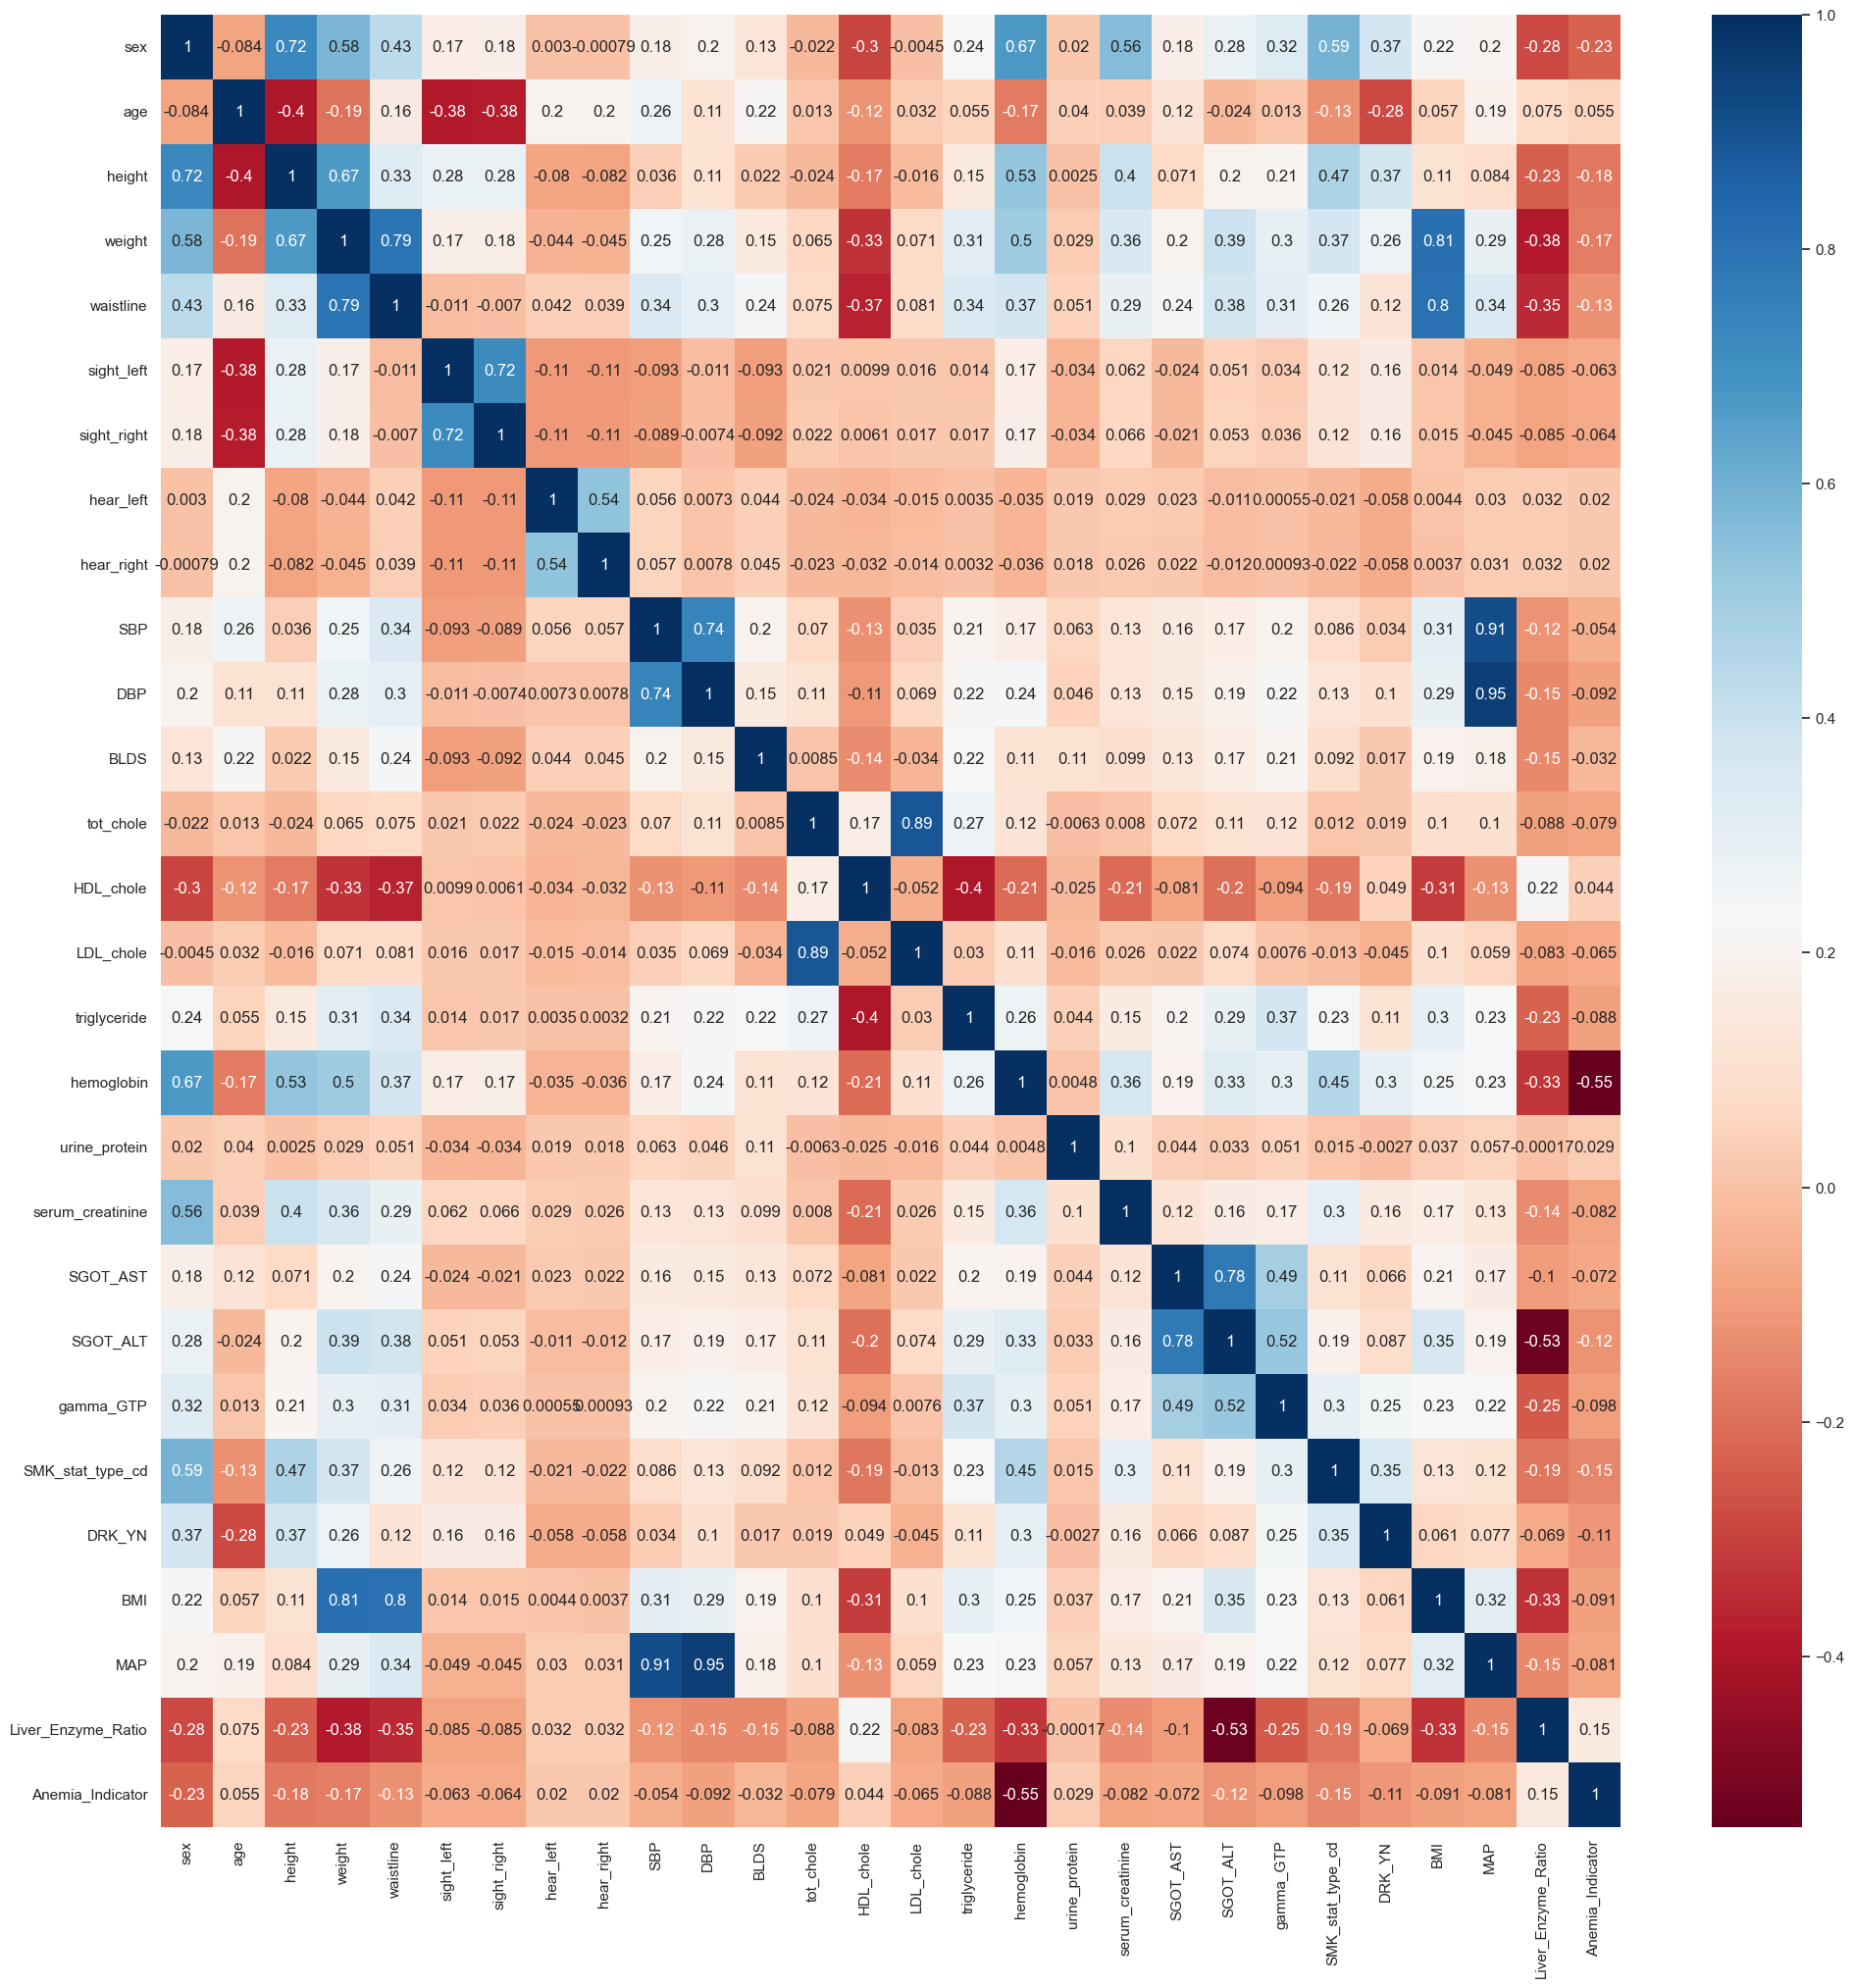

In [ ]:
high_corr_cols = high_correlated_cols(df, True)

In [ ]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN', 'BMI', 'BMI_Category', 'MAP',
       'Liver_Enzyme_Ratio', 'Anemia_Indicator'],
      dtype='object')

In [ ]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,BMI,BMI_Category,MAP,Liver_Enzyme_Ratio,Anemia_Indicator
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,0,1,25.951557,2,93.333333,0.600000,0
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,2,0,24.691358,1,98.000000,0.555556,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,0,0,27.548209,2,86.666667,1.468750,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,0,0,26.122449,2,106.333333,0.852941,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,0,0,22.038567,1,100.666667,1.583333,0


In [ ]:
df.nunique()

sex                      2
age                     14
height                  13
weight                  24
waistline              733
sight_left              23
sight_right             23
hear_left                2
hear_right               2
SBP                    150
DBP                    107
BLDS                   193
tot_chole              387
HDL_chole              156
LDL_chole              337
triglyceride           674
hemoglobin             181
urine_protein            6
serum_creatinine        21
SGOT_AST                93
SGOT_ALT               133
gamma_GTP              248
SMK_stat_type_cd         3
DRK_YN                   2
BMI                    179
BMI_Category             4
MAP                    430
Liver_Enzyme_Ratio    5406
Anemia_Indicator         2
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
smaller_dataset = df.sample(n=20000, random_state=42)

columns_to_scale = smaller_dataset.columns.difference(["DRK_YN", "SMK_stat_type_cd"])

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(smaller_dataset[columns_to_scale])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

scaled_dataset = smaller_dataset.copy()
scaled_dataset = scaled_dataset.reset_index(drop=True)  
scaled_dataset[columns_to_scale] = scaled_df

In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names, model_name):
    """
    Plot a confusion matrix for classification evaluation.

    Args:
        y_true (array-like): True target values.
        y_pred (array-like): Predicted target values.
        class_names (list): List of class names.
        model_name (str): Name of the model for the plot title.

    Returns:
        None
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Model: Confusion Matrix')
    plt.show()

def plot_classification_report(y_true, y_pred, class_names, model_name):
    """
    Plot a classification report for model evaluation.

    Args:
        y_true (array-like): True target values.
        y_pred (array-like): Predicted target values.
        class_names (list): List of class names.
        model_name (str): Name of the model for the plot title.

    Returns:
        None
    """
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(8, 6))
    sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap='Blues', fmt='.2f')
    plt.xlabel('Metrics')
    plt.ylabel('Class')
    plt.title(f'{model_name} Model: Classification Report')
    plt.show()

def plot_roc_curve(y_true, y_prob, model_name):
    """
    Plot a Receiver Operating Characteristic (ROC) curve for model evaluation.

    Args:
        y_true (array-like): True target values.
        y_prob (array-like): Predicted probabilities for positive class.
        model_name (str): Name of the model for the plot title.

    Returns:
        None
    """
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} Model (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Model: Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
X = scaled_dataset.drop(["DRK_YN", "SMK_stat_type_cd"], axis=1)
y = scaled_dataset["DRK_YN"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drinking Model

In [ ]:

# Create instances of the classifiers
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(n_jobs=-1)
knn_classifier = KNeighborsClassifier()
mlp_classifier = MLPClassifier()
svm_classifier = SVC(probability=True)

# Define parameter grids for each classifier
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a dictionary of classifiers and their corresponding parameter grids
classifiers = {
    'DecisionTreeClassifier': (dt_classifier, param_grid_dt),
    'RandomForestClassifier': (rf_classifier, param_grid_rf),
    'KNeighborsClassifier': (knn_classifier, param_grid_knn),
    'NeuralNetworkClassifier': (mlp_classifier, param_grid_mlp),
    'SupportVectorMachine': (svm_classifier, param_grid_svm),
}

classification_models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=100),
    'NeuralNetworkClassifier': MLPClassifier(),
    'SupportVectorMachine': SVC(),
}

for name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)  # Assuming you have training data (X_train, y_train)
    
    # Update the classifier in the original dictionary with the best parameters
    classification_models[name] = grid_search.best_estimator_
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_}")


def train_and_evaluate_models_drinking(models, X_train, X_test, y_train, y_test, confusion_plot=False, classification_plot= False,roc_plot=False):
    """
    Train and evaluate multiple models for a drinking classification problem.

    Args:
        models (dict): A dictionary of model names and their corresponding model objects.
        X_train (array-like): Training feature data.
        X_test (array-like): Testing feature data.
        y_train (array-like): Training target data.
        y_test (array-like): Testing target data.
        confusion_plot (bool): Whether to plot confusion matrices for binary classification.
        classification_plot (bool): Whether to plot a classification report.
        roc_plot (bool): Whether to plot ROC curves for binary classification.

    Returns:
        results (dict): A dictionary of model evaluation results including ROC AUC, Accuracy, Precision, Recall, F1 Score, and Confusion Matrix.
    """
    results = {}

    for model_name, model_conf in models.items():

        model = models[model_name]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        if roc_plot:
            plot_roc_curve(y_test, y_pred, model_name)
        if classification_plot:
            plot_classification_report(y_test, y_pred, ["Yes", "No"] ,model_name)
        if confusion_plot:
            plot_confusion_matrix(y_test, y_pred, ["Yes", "No"],model_name)


        auc_roc = roc_auc_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)


        results[model_name] = {
            'ROC AUC': auc_roc,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': conf_matrix,
        }

        print(f"Model: {model_name}")
        print(f"ROC AUC: {auc_roc}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"Confusion Matrix: \n{conf_matrix}\n")

    return results

new_results = train_and_evaluate_models_drinking(
    classification_models, X_train, X_test, y_train, y_test,
    roc_plot=True ,classification_plot=False ,confusion_plot=False)

Best parameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 10}
Best cross-validation score for DecisionTreeClassifier: 0.681875
Best parameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 200}
Best cross-validation score for RandomForestClassifier: 0.7186874999999999


/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 237, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File 

Best parameters for KNeighborsClassifier: {'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score for KNeighborsClassifier: nan


/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye

Best parameters for NeuralNetworkClassifier: {'alpha': 0.001, 'hidden_layer_sizes': (50,)}
Best cross-validation score for NeuralNetworkClassifier: 0.7261249999999999


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have X_train, y_train, X_test, y_test, and classification_models

# Enable probability estimation for SupportVectorMachine
svm_classifier = SVC(probability=True)

# Create a Voting Classifier with the individual models
drinking_model = VotingClassifier(estimators=[
    ('DecisionTreeClassifier', classification_models['DecisionTreeClassifier']),
    ('RandomForestClassifier', classification_models['RandomForestClassifier']),
    ('KNeighborsClassifier', classification_models['KNeighborsClassifier']),
    ('NeuralNetworkClassifier', classification_models['NeuralNetworkClassifier']),
    ('SupportVectorMachine', svm_classifier),  # Enable probability estimation
], voting="soft")

# Fit the ensemble model
drinking_model.fit(X_train, y_train)

# Obtain probability predictions
drinking_predictions_proba = drinking_model.predict_proba(X_test)[:, 1]

# Obtain class predictions
drinking_predictions = drinking_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, drinking_predictions)
precision = precision_score(y_test, drinking_predictions)
recall = recall_score(y_test, drinking_predictions)
f1 = f1_score(y_test, drinking_predictions)
roc_auc = roc_auc_score(y_test, drinking_predictions_proba)

# Print performance metrics
print("Drinking Prediction Model Performance")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")



## Smoking Model

In [ ]:
X = scaled_dataset.drop(["DRK_YN", "SMK_stat_type_cd"], axis=1)
y = scaled_dataset["SMK_stat_type_cd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc_curve(y_true, y_prob, model_name, n_classes):
    """
    Plot a Receiver Operating Characteristic (ROC) curve for multiclass classification.

    Args:
        y_true (array-like): True target values.
        y_prob (array-like): Predicted probabilities for each class.
        model_name (str): Name of the model for the plot title.
        n_classes (int): Number of classes.

    Returns:
        None
    """
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true, y_prob[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(8, 6))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')


    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:

# Create instances of the classifiers
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(n_jobs=-1)
knn_classifier = KNeighborsClassifier()
mlp_classifier = MLPClassifier()
svm_classifier = SVC(probability=True)

# Define parameter grids for each classifier
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a dictionary of classifiers and their corresponding parameter grids
classifiers = {
    'DecisionTreeClassifier': (dt_classifier, param_grid_dt),
    'RandomForestClassifier': (rf_classifier, param_grid_rf),
    'KNeighborsClassifier': (knn_classifier, param_grid_knn),
    'NeuralNetworkClassifier': (mlp_classifier, param_grid_mlp),
    'SupportVectorMachine': (svm_classifier, param_grid_svm),
}

classification_models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=100),
    'NeuralNetworkClassifier': MLPClassifier(),
    'SupportVectorMachine': SVC(),
}

for name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)  # Assuming you have training data (X_train, y_train)
    
    # Update the classifier in the original dictionary with the best parameters
    classification_models[name] = grid_search.best_estimator_
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_}")


def train_and_evaluate_models_smoking(models, X_train, X_test, y_train, y_test, confusion_plot=False, classification_plot= False,roc_plot=False):
    """
    Train and evaluate multiple models for a smoking classification problem.

    Args:
        models (dict): A dictionary of model names and their corresponding model objects.
        X_train (array-like): Training feature data.
        X_test (array-like): Testing feature data.
        y_train (array-like): Training target data.
        y_test (array-like): Testing target data.
        confusion_plot (bool): Whether to plot confusion matrices for binary classification.
        classification_plot (bool): Whether to plot a classification report.
        roc_plot (bool): Whether to plot ROC curves for binary classification.

    Returns:
        results (dict): A dictionary of model evaluation results including ROC AUC, Accuracy, Precision, Recall, F1 Score, and Confusion Matrix.
    """
    results = {}

    for model_name, model_conf in models.items():

        model = models[model_name]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)


        if roc_plot:
            plot_multiclass_roc_curve(y_test, model.predict_proba(X_test), model_name, 3)


        auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify 'weighted' averaging
        recall = recall_score(y_test, y_pred, average='weighted')  # Specify 'weighted' averaging
        f1 = f1_score(y_test, y_pred, average='weighted')


        results[model_name] = {
            'ROC AUC': auc_roc,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,

        }

        print(f"Model: {model_name}")
        print(f"ROC AUC: {auc_roc}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}\n")

    return results

new_results = train_and_evaluate_models_smoking(
    classification_models, X_train, X_test, y_train, y_test,
    roc_plot=True)

In [ ]:
from sklearn.preprocessing import label_binarize

# Create a Voting Classifier with the individual models
smoking_model = VotingClassifier(estimators=[
    ('DecisionTreeClassifier', classification_models['DecisionTreeClassifier']),
    ('RandomForestClassifier', classification_models['RandomForestClassifier']),
    ('KNeighborsClassifier', classification_models['KNeighborsClassifier']),
    ('NeuralNetworkClassifier', classification_models['NeuralNetworkClassifier']),
    ('SupportVectorMachine', classification_models['SupportVectorMachine']),
], voting="soft")  # You can use "hard" or "soft" voting

# Assuming you have training and testing data (X_train, y_train, X_test, y_test)

smoking_model.fit(X_train, y_train)

smoking_predictions = smoking_model.predict(X_test)
smoking_predictions_v2 = smoking_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, smoking_predictions)

precision = precision_score(y_test, smoking_predictions, average='weighted')

recall = recall_score(y_test, smoking_predictions, average='weighted')

f1 = f1_score(y_test, smoking_predictions, average='weighted')

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, smoking_predictions_v2, average='macro')

print("Smoking Prediction Model Performance")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

In [ ]:
expected_feature_names = [
    'sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
    'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
    'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine',
    'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'BMI', 'BMI_Category', 'MAP', 'Liver_Enzyme_Ratio', 'Anemia_Indicator'
]

my_record = X_test.sample(n=1)[expected_feature_names]

import json
json_data = my_record.to_json(orient='records', lines=True)
parsed_data = json.loads(json_data)
pretty_json = json.dumps(parsed_data, indent=4)
print(f"For input:\n{pretty_json}\n")

drinking_prediction = drinking_model.predict(my_record)
predicted_class_drinking = drinking_prediction[0]
print(f"DRK_YN (1 for Yes / 0 for No):\nPrediction: {predicted_class_drinking}\n")

smoking_prediction = smoking_model.predict(my_record)
predicted_class_smoking = smoking_model.classes_[smoking_prediction[0]]
print(f"SMK_stat_type_cd (Smoking Status 0 for Never Smoked) / 1 for Used to Smoke / 2 for Still Smoking)):\nPrediction: {predicted_class_smoking}")

## Feature Relevance

### Drinking Feature Relevance

In [ ]:
feats = {}

# Access and collect feature importances for each individual classifier
for clf_name, clf in drinking_model.named_estimators_.items():
    if hasattr(clf, 'feature_importances_'):
        for feature, importance in zip(df.columns.difference(["DRK_YN", "SMK_stat_type_cd"]), clf.feature_importances_):
            if feature in feats:
                feats[feature] += importance
            else:
                feats[feature] = importance

                
                
importances = pd.DataFrame.from_dict(feats, orient='index', columns=['Gini-importance'])

importances = importances.sort_values(by='Gini-importance', ascending=False)
importances.plot(kind='bar', rot=90, figsize=(10, 4))
plt.title('Drinking Model Feature Importances')
plt.show()

### Smoking Feature Relevance

In [ ]:
feats = {}

# Access and collect feature importances for each individual classifier
for clf_name, clf in smoking_model.named_estimators_.items():
    if hasattr(clf, 'feature_importances_'):
        for feature, importance in zip(df.columns.difference(["DRK_YN", "SMK_stat_type_cd"]), clf.feature_importances_):
            if feature in feats:
                feats[feature] += importance
            else:
                feats[feature] = importance

                
                
                
importances = pd.DataFrame.from_dict(feats, orient='index', columns=['Gini-importance'])

importances = importances.sort_values(by='Gini-importance', ascending=False)
importances.plot(kind='bar', rot=90, figsize=(10, 4))
plt.title('Smoking Model Feature Importances')
plt.show()

In [ ]:
import tensorflow

In [ ]:
tensorflow.keras.models.save_model(drinking_model, 'model_drinking.pbtxt')
tensorflow.keras.models.save_model(smoking_model, 'model_drinking.pbtxt')

converterdrinking = tensorflow.lite.TFLiteConverter.from_keras_model(model = drinking_model)
convertersmoking = tensorflow.lite.TFLiteConverter.from_keras_model(model = drinking_model)

modeldrinking_tflite = converterdrinking.convert()
modelsmoking_tflite = convertersmoking.convert()

open("healthsignaldrinkingmodel.tflite", "wb").write(modeldrinking_tflite)
open("healthsignalsmokingmodel.tflite", "wb").write(modelsmoking_tflite)
